## Online visualization

In [1]:
import os
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import clear_output
import pre_reconstruction as pr

Welcome to JupyROOT 6.24/06


In [2]:
def pltcosmetics():
    import matplotlib.pyplot as plt
    from matplotlib.ticker import (LinearLocator, MultipleLocator, FormatStrFormatter,AutoMinorLocator)

    font = 20

    fig, ax = plt.subplots(figsize=(10, 7))

    plt.title("Electron Recoils (ER) dataset",fontsize =font)          
    #plt.legend(["                   Entries:","NNC                %d" %(ent[0]),"iDBSCAN          %d" %(ent[1])],fontsize=font)
    plt.xlabel("Cluster light (photons)",fontsize=font, horizontalalignment='right', x=1.0)
    plt.ylabel("Number of clusters",fontsize=font, horizontalalignment='right', y=1.0)            
    plt.grid(color='gray', linestyle=':', alpha = 0.5)
    #plt.xlim([0,4000])
    #plt.ylim([0.5, 10000])
    plt.yscale("log")

    ax = plt.gca()
    ax.tick_params(axis='both', labelcolor='k',labelsize ="xx-large")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    #ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='major',direction="in", length=10, width=1)
    ax.tick_params(which='minor',direction="in", length=5, width=1)

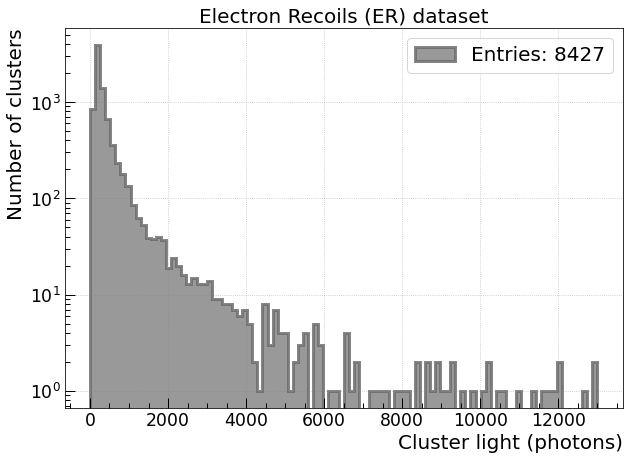

waiting new data
waiting new data


KeyboardInterrupt: 

In [4]:
y1      = []
i1      = []
db_data = "raw_data.csv"
j       = 0

time_old = []

cor = 'dimgray'
face = 'gray'
lwidth = 3

while(j < 100):
    
    if os.path.isfile(db_data):
        
        time_new = os.path.getmtime(db_data)
        if time_new == time_old:
            print ("waiting new data")
            time.sleep(7)
            j+=1
        else:
            time_old = time_new
            ## load data
            try:
                df = pr.opendata_table('raw_data.csv')
            
                ## Clear output
                clear_output(wait=True)

                var = df.Integral

                ## Define bins and range
                bins = int(np.sqrt(len(var)))
                rangel = [0, 13000]

                ## Plot histogram
                pltcosmetics()
                plt.hist(var, bins=100, range=rangel, histtype='stepfilled', density=False, alpha=0.8, color=cor,edgecolor=cor,facecolor=face,linewidth=lwidth)
                plt.legend(["Entries: %d" %(len(var))],fontsize=20)
                plt.show()
                ## Delay to show plot
                time.sleep(0.5)
            except:
                print ("Load file error, trying again...")
                time.sleep(1)
                
    else:
        print ("Database file not exist")
        time.sleep(5)
        j+=1
        

In [19]:
df = pr.opendata_table('raw_data.csv')

Found Table


In [26]:
df[(df.Event==1) & (df.xmean>1900) & (df.xmean<2200)]

,Run,Event,Nclu,Size,nhits,Integral,xmean,ymean,xmax,xmin,ymax,ymin
207,5890,1,97,496,190,52008,1904.076777,1662.772900,1919,1892,1679,1648
208,5890,1,98,464,203,49052,1931.866407,180.805818,1947,1916,191,168
209,5890,1,99,1248,542,132235,1971.663576,1598.956948,1999,1948,1623,1572
210,5890,1,100,768,350,81931,1988.635840,663.714199,2007,1972,679,648
211,5890,1,101,848,347,89926,2039.570647,1539.121500,2059,2020,1555,1524
212,5890,1,102,576,244,61822,2105.564249,902.676539,2119,2088,919,888
213,5890,1,103,448,166,47165,2137.656228,1464.078088,2151,2124,1475,1452
214,5890,1,104,320,108,33773,2179.836822,1319.296924,2191,2168,1327,1308
